<a href="https://colab.research.google.com/github/debora-ns/Base-de-dados-Biblioteca/blob/main/Analise_Pre%C3%A7o_Im%C3%B3veis_SP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto prático nº2** - *Análise de Variação de Preço de Imóveis em SP*

In [42]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Trazendo o arquivo csv para base de dados
dados = pd.read_csv("base-alugueis-sp.csv")
df = pd.DataFrame(dados)

#Limpeza dos dados (remover linhas com valores nulos)
df_limpo = df.dropna()

#Análise descritiva
estatisticas = df_limpo.describe()
dados.describe().round(2)

,area,bedrooms,garage,rent,total
count,11657.00,11657.00,11657.00,11657.00,11657.00
mean,84.66,1.97,1.06,3250.81,4080.03
std,74.02,0.93,1.13,2650.71,3352.48
min,0.00,0.00,0.00,500.00,509.00
25%,40.00,1.00,0.00,1590.00,1996.00
50%,60.00,2.00,1.00,2415.00,3057.00
75%,96.00,3.00,2.00,3800.00,4774.00
max,580.00,6.00,6.00,25000.00,28700.00


In [18]:
# Filtrando os imóveis com área igual a 0
imoveis_area_zero = dados[dados["area"] == 0]

# Exibindo os dados dos imóveis com área igual a 0
print(imoveis_area_zero)

                    address                district  area  bedrooms  garage  \
2983           Rua Relíquia  Jardim das Laranjeiras     0         2       1   
7085  Rua Edmundo de Amicis                 Morumbi     0         3       2   

             type  rent  total  
2983  Apartamento  1600   2569  
7085         Casa  3200   3351  


In [19]:
#Verificando o tamanho do Dataset
dados.shape

(11657, 8)

In [24]:
#Para analisar a matriz de correlação, precisamos extrair apenas as colunas com valores numéricos
#Selecionando apenas as colunas numéricas
colunas_numericas = ["area", "bedrooms", "garage", "rent", "total"]
dados_numericos = dados[colunas_numericas]

#Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr().round(4)
print(matriz_correlacao)

            area  bedrooms  garage    rent   total
area      1.0000    0.7279  0.7334  0.6672  0.6521
bedrooms  0.7279    1.0000  0.6569  0.5312  0.5260
garage    0.7334    0.6569  1.0000  0.6173  0.6180
rent      0.6672    0.5312  0.6173  1.0000  0.9781
total     0.6521    0.5260  0.6180  0.9781  1.0000


In [33]:
#Configurando a paleta de cores
sns.set_palette("Accent")

#Configurando o estilo
sns.set_style("darkgrid")

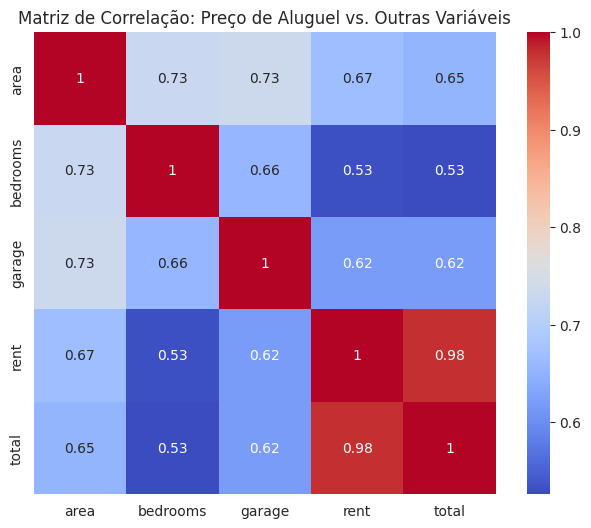

In [34]:
# Criando o mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", square=True)
plt.title("Matriz de Correlação: Preço de Aluguel vs. Outras Variáveis")
plt.show()

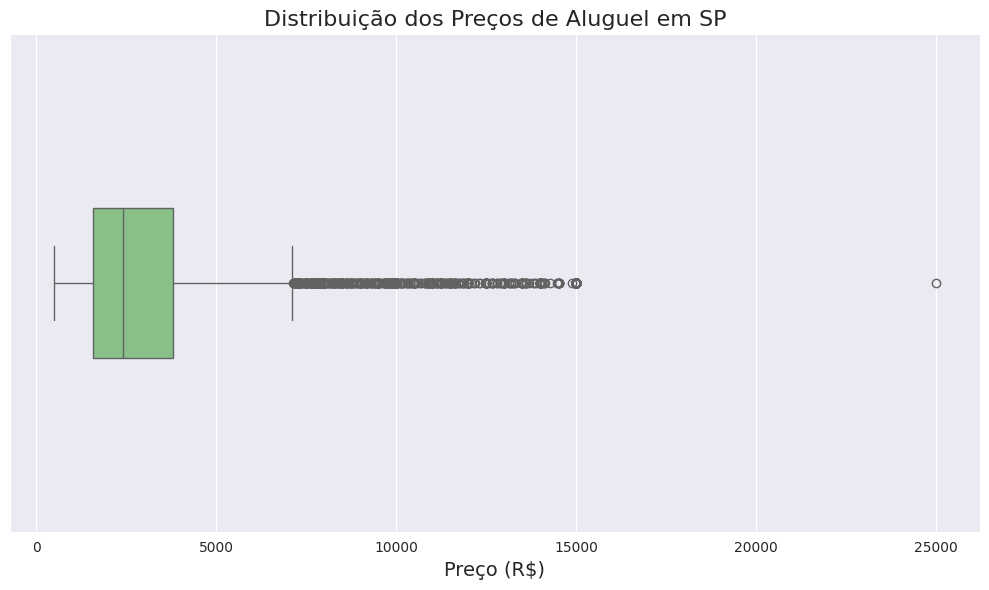

In [37]:
#Criando o gráfico de caixa
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=dados["rent"], orient="h", width=0.3)
ax.set_title("Distribuição dos Preços de Aluguel em SP", fontsize=16)
ax.set_xlabel("Preço (R$)", fontsize=14)

#Ajustando o tamanho da figura
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

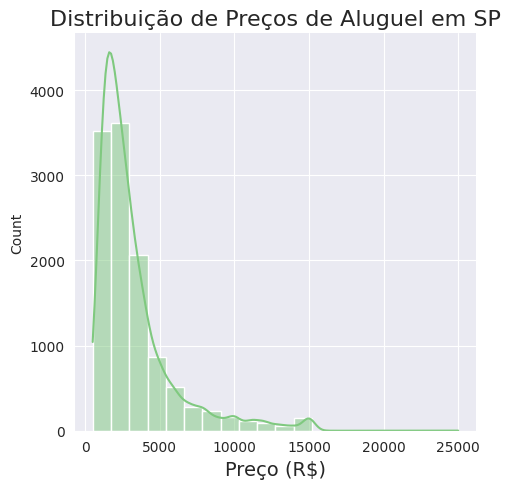

In [41]:
#Criando o gráfico de distribuição
plt.figure(figsize=(10, 6))
sns.displot(data=dados, x="rent", kde=True, bins=20)
plt.title("Distribuição de Preços de Aluguel em SP", fontsize=16)
plt.xlabel("Preço (R$)", fontsize=14)

#Ajustando o tamanho da figura
plt.tight_layout()

#Exibindo o gráfico
plt.show()

In [44]:
#Selecionando Colunas Relevantes
X = dados[["area"]]  # Variável independente (área)
y = dados["rent"]    # Variável dependente (preço do aluguel)


In [ ]:
#Ajuste um modelo de regressão linear aos dados para tentar prever o preço do aluguel em uma determinada área;
